# Import library

In [4]:
import numpy as np, pandas as pd
from glob import glob
import shutil, os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
import seaborn as sns
from os import listdir
from os.path import isfile, join
import yaml

In [ ]:
# Install required packages
import subprocess
import sys

packages = [
    'numpy', 'pandas', 'matplotlib', 'seaborn', 
    'scikit-learn', 'tqdm', 'pyyaml', 'torch', 'torchvision'
]

for package in packages:
    try:
        result = subprocess.run([sys.executable, '-m', 'pip', 'install', package], 
                              capture_output=True, text=True, check=True)
        print(f"✓ {package} installed successfully")
    except subprocess.CalledProcessError as e:
        print(f"✗ Error installing {package}: {e}")

print("Package installation completed!")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Google Colab drive mount not needed in local environment
# Skipping this cell - data is already available locally
print("Running in local environment - no need to mount Google Drive")

Running in local environment - no need to mount Google Drive


In [5]:
import torch
from IPython.display import Image, clear_output  # to display images

In [6]:
clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.7.1+cpu (CPU)


# Install YOLOv5

In [15]:
import os
# Change to the local project directory
os.chdir('d:/AITest/AIXRAY')
print(f"Current working directory: {os.getcwd()}")

Current working directory: d:\AITest\AIXRAY


In [ ]:
# YOLOv5 repository already exists locally
# Just change to the yolov5 directory and install requirements
os.chdir('yolov5')
print(f"Current directory: {os.getcwd()}")

# Install requirements
import subprocess
import sys

try:
    result = subprocess.run([sys.executable, '-m', 'pip', 'install', '-r', 'requirements.txt'], 
                          capture_output=True, text=True, check=True)
    print("Requirements installed successfully")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print(f"Error installing requirements: {e}")
    print(e.stderr)

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/VinBigData/yolov5


In [ ]:
# Need run this script before train model
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

/content/drive/MyDrive/VinBigData/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.9 MB/s eta 0:00:00


# Create dataset YAML configuration

In [1]:
classes = ['Aortic enlargement','Atelectasis','Calcification','Cardiomegaly','Consolidation','ILD','Infiltration','Lung Opacity','Nodule/Mass','Other lesion',
             'Pleural effusion','Pleural thickening','Pneumothorax','Pulmonary fibrosis']
classes

['Aortic enlargement',
 'Atelectasis',
 'Calcification',
 'Cardiomegaly',
 'Consolidation',
 'ILD',
 'Infiltration',
 'Lung Opacity',
 'Nodule/Mass',
 'Other lesion',
 'Pleural effusion',
 'Pleural thickening',
 'Pneumothorax',
 'Pulmonary fibrosis']

In [16]:
import os
from os.path import join
from glob import glob
import yaml

# Change to the AIXRAY directory first
os.chdir('d:/AITest/AIXRAY')

cwd = 'yolov5/data'
data_dir = 'data/images'

# Create the data directory in yolov5 if it doesn't exist
os.makedirs(cwd, exist_ok=True)

# Generate file lists for train, val, and test sets
with open(join(cwd, 'train.txt'), 'w') as f:
    train_images = glob(f'{data_dir}/train/*')
    for path in train_images:
        # Convert to absolute path and normalize for Windows
        abs_path = os.path.abspath(path).replace('\\', '/')
        f.write(abs_path + '\n')

with open(join(cwd, 'val.txt'), 'w') as f:
    val_images = glob(f'{data_dir}/val/*')
    for path in val_images:
        # Convert to absolute path and normalize for Windows
        abs_path = os.path.abspath(path).replace('\\', '/')
        f.write(abs_path + '\n')

with open(join(cwd, 'test.txt'), 'w') as f:
    test_images = glob(f'{data_dir}/test/*')
    for path in test_images:
        # Convert to absolute path and normalize for Windows
        abs_path = os.path.abspath(path).replace('\\', '/')
        f.write(abs_path + '\n')

# Dataset configuration
data = dict(
    train=os.path.abspath(join(cwd, 'train.txt')).replace('\\', '/'),
    val=os.path.abspath(join(cwd, 'val.txt')).replace('\\', '/'),
    test=os.path.abspath(join(cwd, 'test.txt')).replace('\\', '/'),
    nc=14,
    names=classes
)

# Save the YAML configuration
with open(join(cwd, 'vinbigdata.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

# Read and display the configuration
with open(join(cwd, 'vinbigdata.yaml'), 'r') as f:
    config_content = f.read()
    print("Dataset configuration created:")
    print(config_content)

print(f"\nFound {len(train_images)} training images")
print(f"Found {len(val_images)} validation images") 
print(f"Found {len(test_images)} test images")

Dataset configuration created:
names:
- Aortic enlargement
- Atelectasis
- Calcification
- Cardiomegaly
- Consolidation
- ILD
- Infiltration
- Lung Opacity
- Nodule/Mass
- Other lesion
- Pleural effusion
- Pleural thickening
- Pneumothorax
- Pulmonary fibrosis
nc: 14
test: d:/AITest/AIXRAY/yolov5/data/test.txt
train: d:/AITest/AIXRAY/yolov5/data/train.txt
val: d:/AITest/AIXRAY/yolov5/data/val.txt


Found 3558 training images
Found 396 validation images
Found 440 test images


# Training model yolov5

In [ ]:
# Change to the yolov5 directory in local environment
os.chdir('d:/AITest/AIXRAY/yolov5')
print(f"Current working directory: {os.getcwd()}")

/content/drive/MyDrive/VinBigData/yolov5


In [ ]:
!pip install wandb

In [ ]:
%rm -rf runs

In [ ]:
# Training with local environment
# Make sure we're in the correct directory
os.chdir('d:/AITest/AIXRAY/yolov5')

# Training command for local environment
import subprocess
import sys

train_cmd = [
    sys.executable, 'train.py',
    '--img', '640',
    '--batch', '16', 
    '--epochs', '100',
    '--data', 'data/vinbigdata.yaml',
    '--weights', '',  # Start from scratch
    '--cfg', 'models/yolov5s.yaml',
    '--patience', '10',
    '--cache',
    '--optimizer', 'SGD'
]

print("Starting YOLOv5 training...")
print(f"Command: {' '.join(train_cmd)}")

# You can uncomment the line below to run training
# result = subprocess.run(train_cmd, capture_output=False, text=True)
print("Note: Uncomment the subprocess.run line above to start training")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  with torch.cuda.amp.autocast(amp):
      55/99      4.53G    0.05134    0.04648    0.02666        192        640:  98% 219/223 [01:01<00:01,  2.98it/s]/content/drive/MyDrive/VinBigData/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      55/99      4.53G    0.05134    0.04645    0.02666         91        640:  99% 220/223 [01:02<00:00,  3.17it/s]/content/drive/MyDrive/VinBigData/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      55/99      4.53G    0.05132    0.04641    0.02665        118        640:  99% 221/223 [01:02<00:00,  3.26it/s]/content/drive/MyDrive/VinBigData/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please u

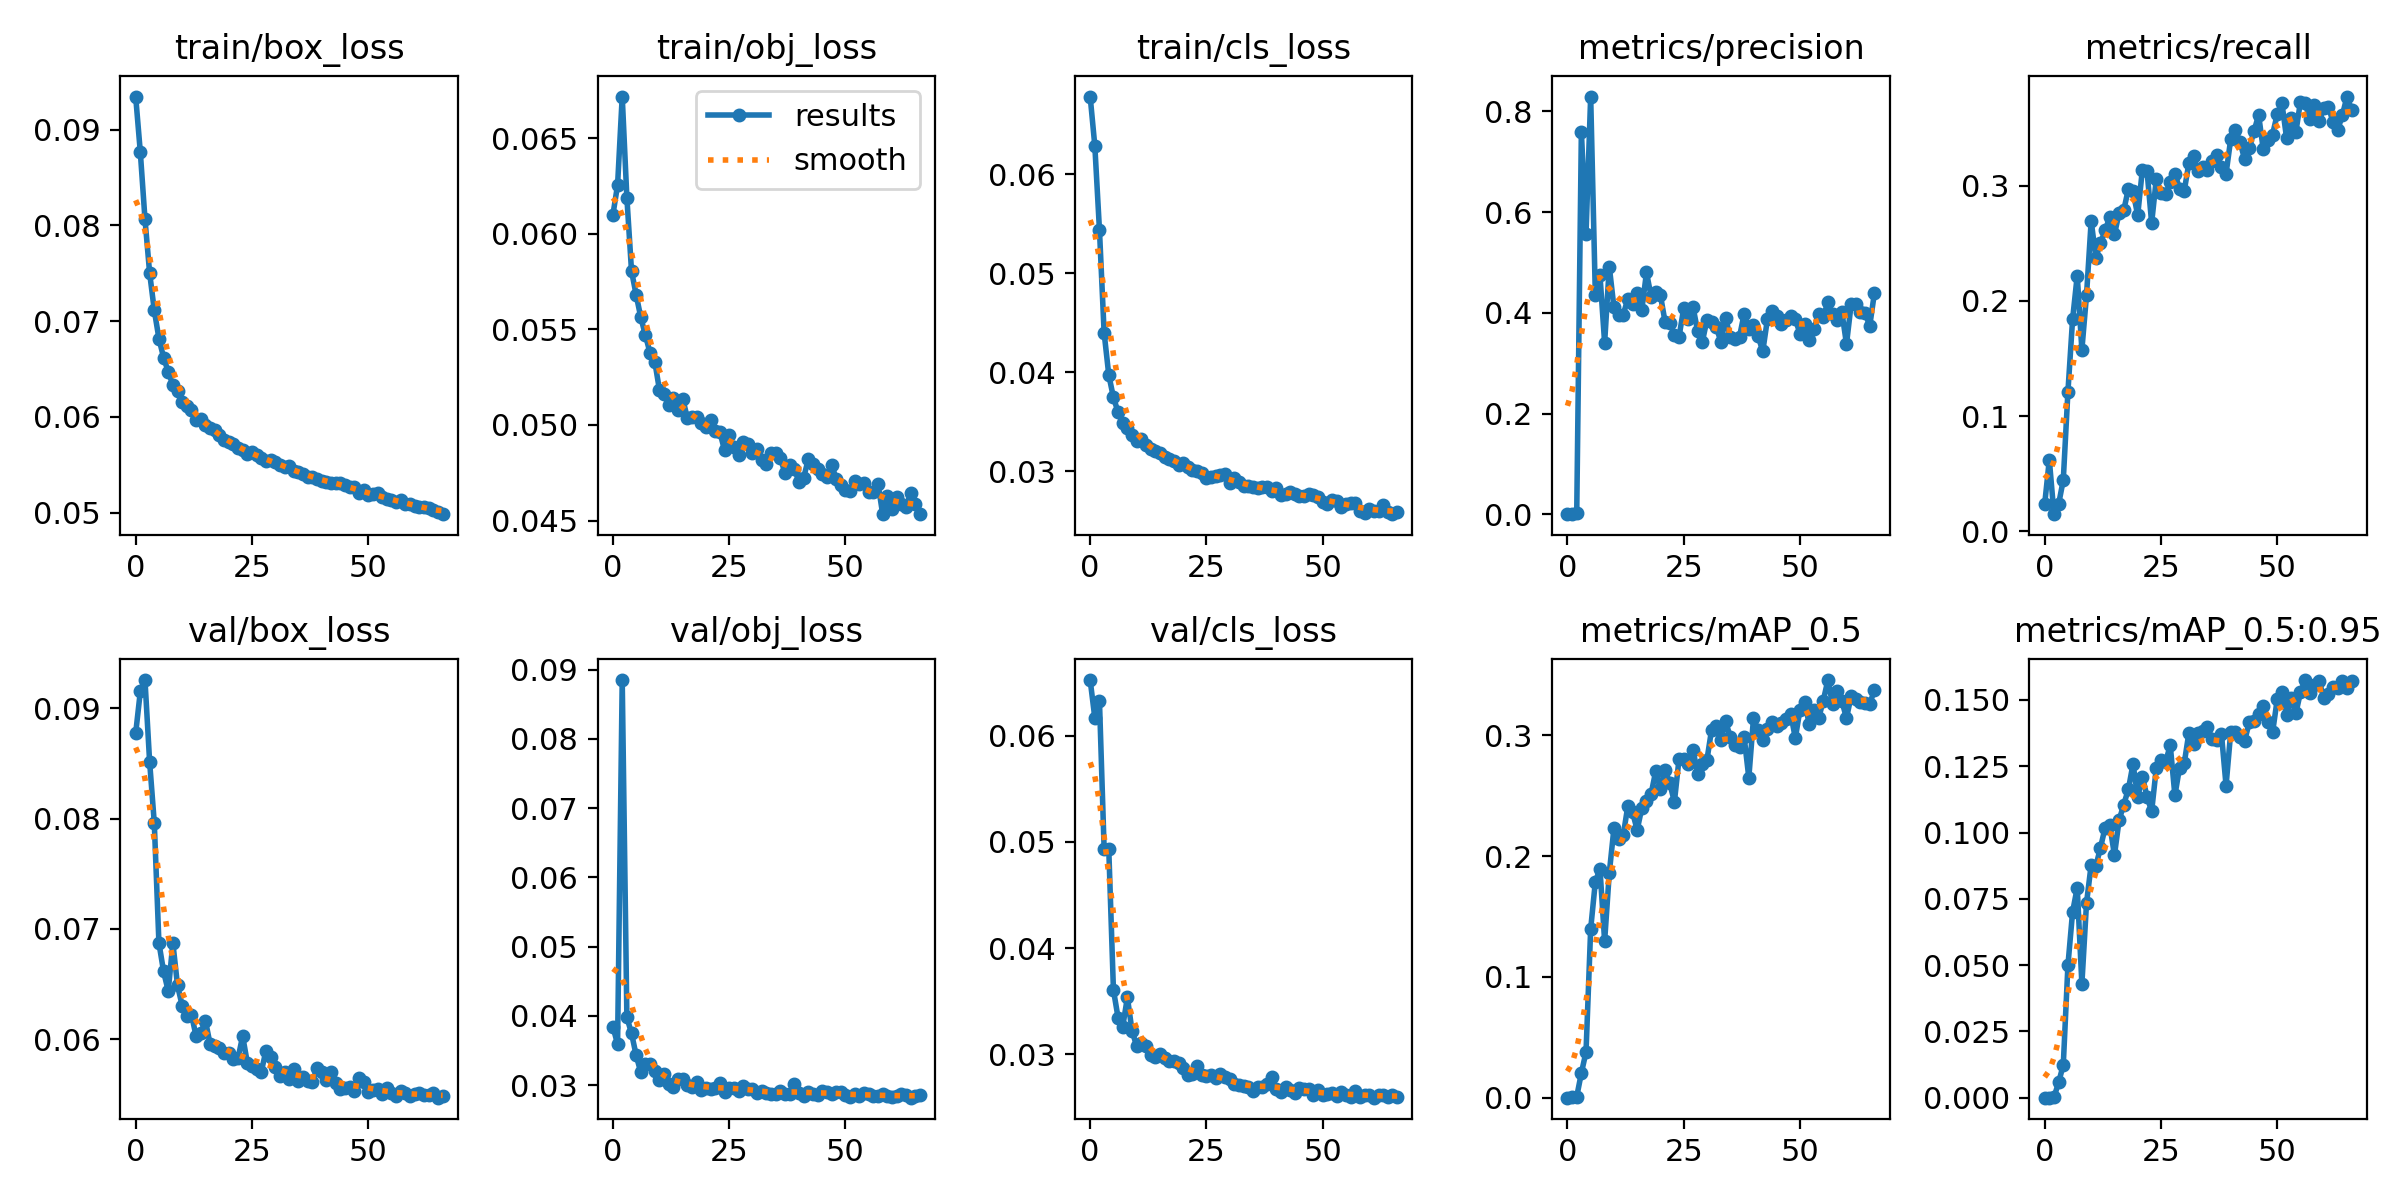

In [10]:
from IPython.display import Image
Image(filename='yolov5/runs/train/exp/results.png', width=1200)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter

%matplotlib inline

# Replace cv2_imshow with matplotlib for local environment
def cv2_imshow(image):
    """
    Display image using matplotlib instead of cv2_imshow (which is Colab-specific)
    """
    if len(image.shape) == 3:
        # Convert BGR to RGB for matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
    else:
        # Grayscale image
        plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [8]:
# Defination function method

# Get image as numpy array
def load_image(name, path):
    img_path = path + name + '.jpg'
    img = cv2.imread(img_path)
    return img
# Plot numpy array
def plot_image(img):
    plt.imshow(img)
    plt.title(img.shape)

# Plot a grid of examples
def plot_grid(img_names, img_root, rows=5, cols=5):
    fig = plt.figure(figsize=(25,25))

    for i,name in enumerate(img_names):
        fig.add_subplot(rows,cols,i+1)
        img = load_image(name, img_root)
        plot_image(img)

    plt.show()

In [10]:
def class_to_color(class_id):
    colors = [(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255),(255,100,100),
              (100,255,100),(100,100,255),(255,100,0),(255,0,100),(100,0,255),(100,100,255),(100,255,0),
              (100,255,100)]
    return colors[class_id]

# draw a single bounding box onto a numpy array image
def draw_bounding_box(img, annotation):
    if annotation.isnull().values.any():
        return

    x_min, y_min = int(annotation['x_min']), int(annotation['y_min'])
    x_max, y_max = int(annotation['x_max']), int(annotation['y_max'])

    class_id = int(annotation['class_id'])
    color = class_to_color(class_id)
    #draw rectangle with coordinates
    cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 5)

# draw all annotation bounding boxes on an image
def annotate_image(img, name, all_annotations):
    annotations = all_annotations[all_annotations['image_id'] == name]
    for index, row in annotations.iterrows():
        draw_bounding_box(img, row)

# Plot a grid of xray images, each with all its bounding boxes
def plot_annotated_grid(img_names, img_root, all_annotations, rows=5, cols=5):
    fig = plt.figure(figsize=(25,25))

    for i,name in enumerate(img_names):
        fig.add_subplot(rows,cols,i+1)
        img = load_image(name, img_root)
        annotate_image(img, name, all_annotations)
        plot_image(img)

    plt.show()

def plot_annotated_image(img_name, img_root, all_annotations):
  img = load_image(img_name, img_root)
  annotate_image(img, img_name, all_annotations)
  plot_image(img)

In [11]:
# Update paths for local environment
LABLE_TRAIN_PATH = 'd:/AITest/AIXRAY/train.csv'  # Update this path if you have a train.csv file
LABLE_TEST_PATH = 'd:/AITest/AIXRAY/test.csv'    # Update this path if you have a test.csv file
IMG_TRAIN_PATH = 'd:/AITest/AIXRAY/data/images/train/'
IMG_TEST_PATH = 'd:/AITest/AIXRAY/data/images/test/'

# LABLE_TRAIN_PATH = '/content/drive/MyDrive/VinBigData/train.csv'
# LABLE_TEST_PATH = '/content/drive/MyDrive/VinBigData/test.csv'
# IMG_TRAIN_PATH = '/content/drive/MyDrive/VinBigData/image_dataset/'
# IMG_TEST_PATH = '/content/vindataset/vinbigdata/test/'

print("Paths configured for local environment:")
print(f"Train labels: {LABLE_TRAIN_PATH}")
print(f"Test labels: {LABLE_TEST_PATH}")
print(f"Train images: {IMG_TRAIN_PATH}")
print(f"Test images: {IMG_TEST_PATH}")

Paths configured for local environment:
Train labels: d:/AITest/AIXRAY/train.csv
Test labels: d:/AITest/AIXRAY/test.csv
Train images: d:/AITest/AIXRAY/data/images/train/
Test images: d:/AITest/AIXRAY/data/images/test/


In [12]:
data_train_lable = pd.read_csv(LABLE_TRAIN_PATH, delimiter=',')
data_train_lable

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072
...,...,...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN,2444,3200
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN,1994,2430
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN,2048,2500
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0,1968,2040


In [ ]:
# Detection command for local environment
import subprocess
import sys
import os

# Make sure we're in the yolov5 directory
os.chdir('d:/AITest/AIXRAY/yolov5')

# Check if the weights file exists
weights_path = './runs/train/exp/weights/best.pt'
if not os.path.exists(weights_path):
    print(f"Warning: Weights file not found at {weights_path}")
    print("You need to train the model first or use pre-trained weights")
else:
    # Use local image path instead of Colab path
    source_image = 'd:/AITest/AIXRAY/data/images/test/0391d2388a2442f14d055d5089a747c6.jpg'
    
    detect_cmd = [
        sys.executable, 'detect.py',
        '--weights', weights_path,
        '--img', '640',
        '--source', source_image,
        '--conf', '0.25',
        '--save-txt',
        '--save-conf'
    ]
    
    print("Running detection...")
    print(f"Command: {' '.join(detect_cmd)}")
    
    # Run the detection
    try:
        result = subprocess.run(detect_cmd, capture_output=False, text=True, check=True)
        print("Detection completed successfully!")
    except subprocess.CalledProcessError as e:
        print(f"Error running detection: {e}")
    except FileNotFoundError:
        print(f"Source image not found: {source_image}")
        print("Please check if the image file exists in the specified path")

d:\AITest\AIXRAY\yolov5\utils\general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
detect: weights=['./runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/VinBigData/data/images/test/0391d2388a2442f14d055d5089a747c6.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-416-gfe1d4d99 Python-3.13.2 torch-2.7.1+cpu CPU

Traceback (most recent call last):
  File "d:

In [22]:
import os
from IPython.display import Image

# Find the latest detection results
detection_base = 'runs/detect'
detection_dirs = [d for d in os.listdir(detection_base) if d.startswith('exp')]
detection_dirs.sort(key=lambda x: os.path.getmtime(os.path.join(detection_base, x)), reverse=True)
latest_detection = detection_dirs[0] if detection_dirs else 'exp'

detection_dir = f'{detection_base}/{latest_detection}'
print(f"Latest detection directory: {detection_dir}")

# List all files in the detection directory
if os.path.exists(detection_dir):
    print("Files in detection directory:")
    for item in os.listdir(detection_dir):
        item_path = os.path.join(detection_dir, item)
        if os.path.isdir(item_path):
            print(f"  Directory: {item}/")
            # List files in subdirectory
            for subitem in os.listdir(item_path):
                print(f"    {subitem}")
        else:
            print(f"  File: {item}")

# Try to find any image files
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
found_images = []
for root, dirs, files in os.walk(detection_dir):
    for file in files:
        if any(file.lower().endswith(ext) for ext in image_extensions):
            found_images.append(os.path.join(root, file))

if found_images:
    print(f"\nFound {len(found_images)} image(s):")
    for img in found_images:
        print(f"  {img}")
        # Try to display the first found image
        try:
            display(Image(filename=img, width=600))
            break
        except:
            print(f"  Could not display {img}")
else:
    print("\nNo image files found in detection results.")
    
    # Check if labels were generated
    labels_dir = os.path.join(detection_dir, 'labels')
    if os.path.exists(labels_dir):
        print(f"\nLabel files found in {labels_dir}:")
        label_files = os.listdir(labels_dir)
        for label_file in label_files[:5]:  # Show first 5 label files
            print(f"  {label_file}")
        
        # Read and display contents of first label file
        if label_files:
            first_label = os.path.join(labels_dir, label_files[0])
            print(f"\nContents of {label_files[0]}:")
            try:
                with open(first_label, 'r') as f:
                    content = f.read().strip()
                    if content:
                        print(content)
                    else:
                        print("  (empty file - no detections)")
            except:
                print("  Could not read label file")

Latest detection directory: runs/detect/exp7
Files in detection directory:
  Directory: labels/

No image files found in detection results.

Label files found in runs/detect/exp7\labels:


TypeError: Image data of dtype object cannot be converted to float

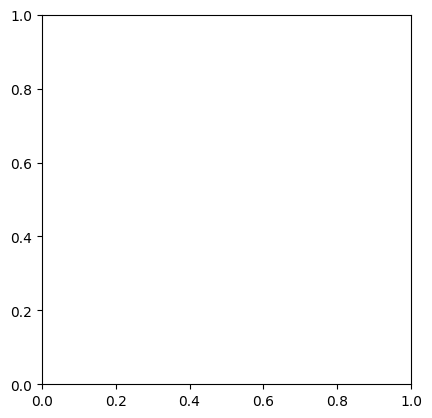

In [29]:
plot_annotated_image('0391d2388a2442f14d055d5089a747c6', IMG_TRAIN_PATH, data_train_lable)
plt.show()

# Validate trained model

In [ ]:
# Validation command for local environment
import subprocess
import sys
import os

# Make sure we're in the yolov5 directory
os.chdir('d:/AITest/AIXRAY/yolov5')

# Check if the weights file exists
weights_path = './runs/train/exp/weights/best.pt'
if not os.path.exists(weights_path):
    print(f"Warning: Weights file not found at {weights_path}")
    print("You need to train the model first or use pre-trained weights")
else:
    val_cmd = [
        sys.executable, 'val.py',
        '--weights', weights_path,
        '--data', 'data/vinbigdata.yaml',
        '--img', '640',
        '--conf', '0.25',
        '--iou', '0.45'
    ]
    
    print("Running validation...")
    print(f"Command: {' '.join(val_cmd)}")
    
    # You can uncomment the line below to run validation
    # result = subprocess.run(val_cmd, capture_output=False, text=True)
    print("Note: Uncomment the subprocess.run line above to run validation")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
val: data=data/vinbigdata.yaml, weights=['./runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
100% 755k/755k [00:00<00:00, 23.9MB/s]
val: Scanning /content/drive/MyDriv

In [ ]:
# Test validation command for local environment
import subprocess
import sys
import os

# Make sure we're in the yolov5 directory
os.chdir('d:/AITest/AIXRAY/yolov5')

# Check if the weights file exists
weights_path = './runs/train/exp/weights/best.pt'
if not os.path.exists(weights_path):
    print(f"Warning: Weights file not found at {weights_path}")
    print("You need to train the model first or use pre-trained weights")
else:
    test_val_cmd = [
        sys.executable, 'val.py',
        '--weights', weights_path,
        '--data', 'data/vinbigdata.yaml',
        '--img', '640',
        '--conf', '0.25',
        '--iou', '0.45',
        '--save-txt',
        '--task', 'test'
    ]
    
    print("Running test validation with text output...")
    print(f"Command: {' '.join(test_val_cmd)}")
    
    # You can uncomment the line below to run test validation
    # result = subprocess.run(test_val_cmd, capture_output=False, text=True)
    print("Note: Uncomment the subprocess.run line above to run test validation")

val: data=data/vinbigdata.yaml, weights=['./runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
test: Scanning /content/drive/MyDrive/VinBigData/yolov5/data/test... 440 images, 0 backgrounds, 0 corrupt: 100% 440/440 [07:40<00:00,  1.05s/it]
test: New cache created: /content/drive/MyDrive/VinBigData/yolov5/data/test.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 14/14 [00:15<00:00,  1.11s/it]
                   all        44

In [ ]:
from utils.plots import plot_results

# Plot results from a specific training run directory
plot_results("runs/train/exp/results.csv")  # This will generate 'results.png' in the same directory

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


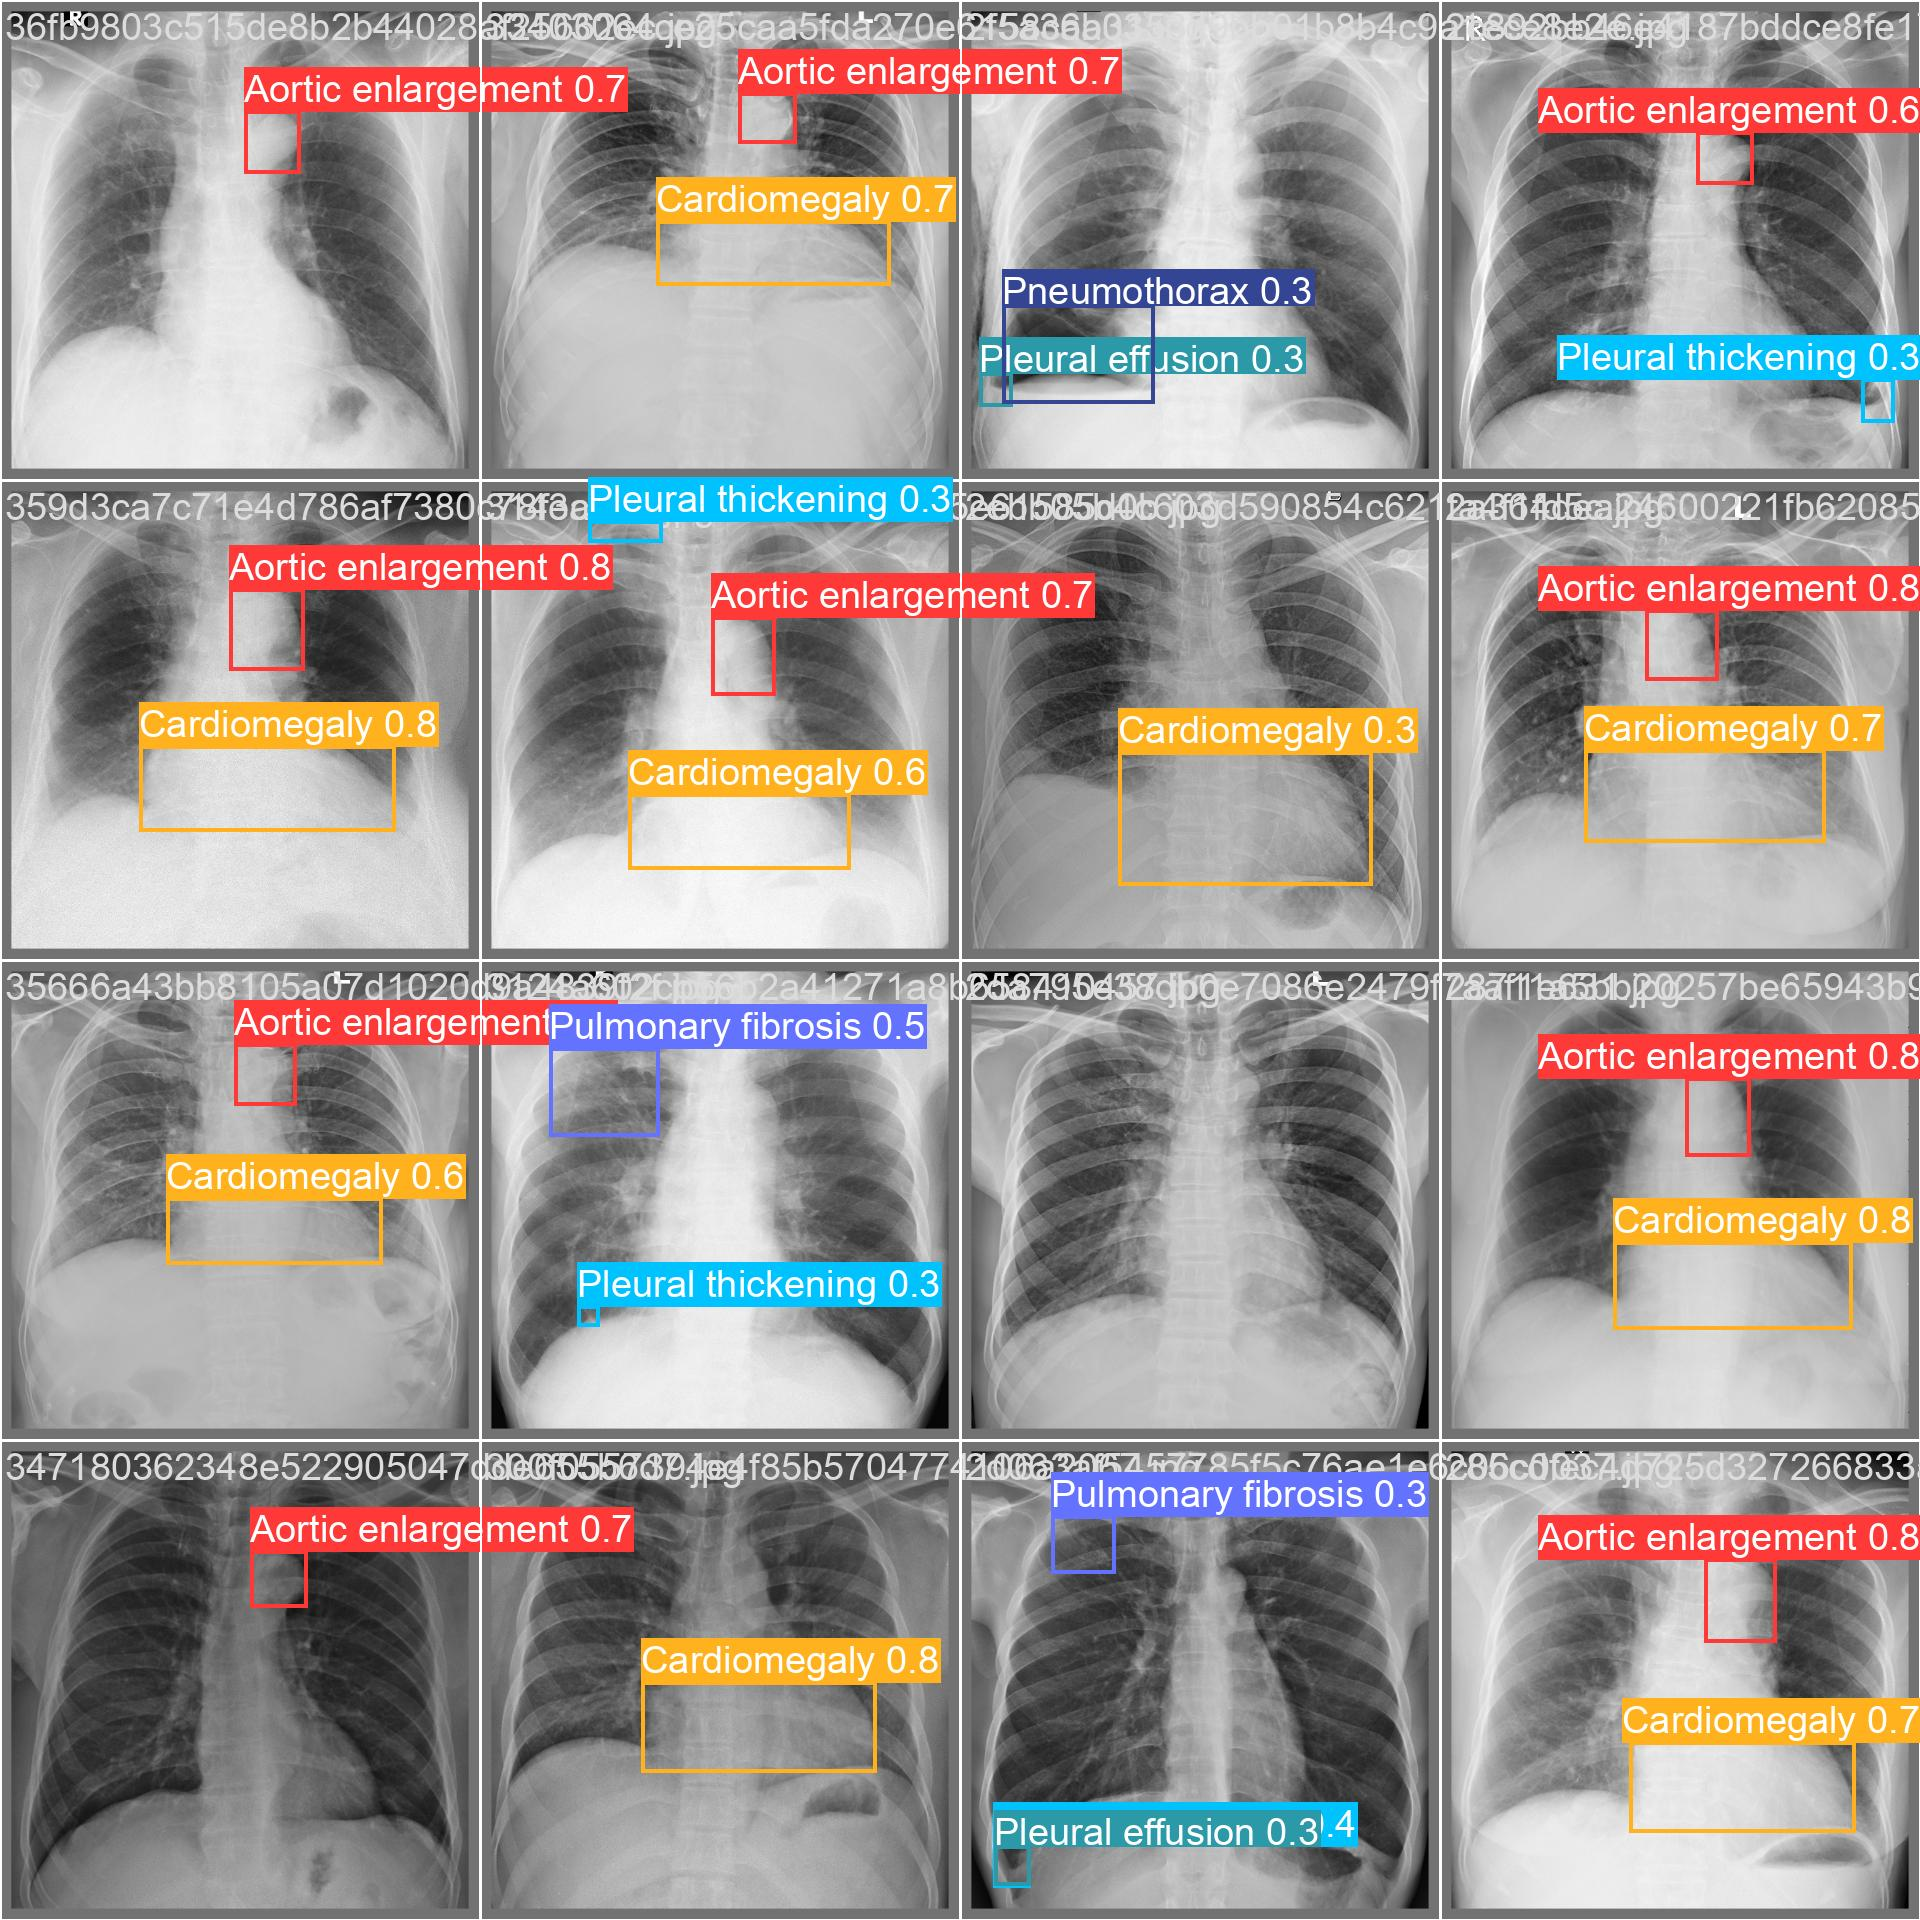

In [ ]:
Image(filename='/content/drive/MyDrive/VinBigData/yolov5/runs/val/exp2/val_batch2_pred.jpg', width=1200)